In [1]:
!pip install plotly
!pip install nxviz Bokeh


#CircosPlot from nxviz (used to be circos). This is developed by Eric Ma on top of Matplotlib. Note that the documentation seems minimal but as Eric is not paid for this (and is a PhD student) I am sure he would appreciate help improving the docs.
#Chord provided by Bokeh looks great but I am not sure how simple it is to adjust how it displays (note that the box_zoom tool creates visual distortions, turn this off by specifying the plot tools using the kwarg tools='pan,wheel_soom,save,reset')

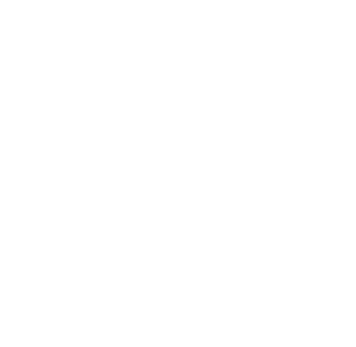

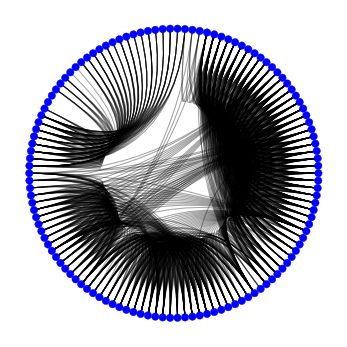

In [2]:
import pickle
import networkx
from nxviz import CircosPlot
from nxviz.plots import CircosPlot
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
with open('conn_mat.p','rb') as f:
   [plot_excit,plot_inhib] = pickle.load(f)  
import numpy as np
excm = np.matrix(plot_excit)


Gexc = nx.DiGraph(nx.from_numpy_matrix(excm))
inhibm = np.matrix(plot_inhib)
Ginhib = nx.DiGraph(nx.from_numpy_matrix(inhibm))

labels = [ str(i) for i,j in enumerate(excm) ]


for n, d in Gexc.nodes(data=True):
    Gexc.node[n]['value'] = Gexc.in_degree(n)
c = CircosPlot(Gexc)

# Assume we have a professional network of physicians belonging
# to hospitals.
c = CircosPlot(Gexc)
#print(dir(c))
c.draw()
plt.show()
#print(help(nx.from_numpy_matrix))
# 
#help(CircosPlot)

# Fall back chord diagrams, 
not interactive, or informative but a starting point.
Note also that you might be able to hack and reverse engineer the methods inside 'c' the CircosPlot object to use it as fail overcoming substitutions for the plot.ly code functions below.

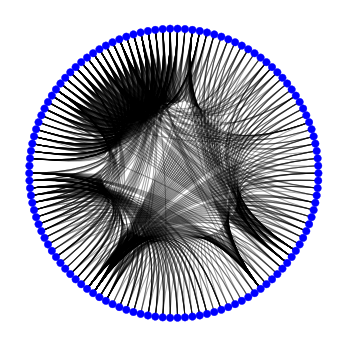

In [3]:
c = CircosPlot(Ginhib)
c.draw()

plt.show()

Note dir on c shows you what methods and attributes are bound to the object.

In [4]:
print(dir(c))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ax', 'check_data_types', 'compute_edge_colors', 'compute_node_colors', 'compute_node_label_positions', 'compute_node_positions', 'data_types', 'draw', 'draw_edges', 'draw_nodes', 'edge_color', 'edge_colors', 'edge_width', 'edgeprops', 'edges', 'figure', 'graph', 'group_and_sort_nodes', 'node_color', 'node_colors', 'node_coords', 'node_grouping', 'node_label_aligns', 'node_label_coords', 'node_labels', 'node_order', 'node_size', 'nodeprops', 'nodes', 'plot_radius', 'sm']


In [5]:
## import plotly.plotly as py
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import *

import numpy as np
PI = np.pi

matrix = np.matrix(plot_excit)



import numpy as np
'''s
matrix=np.array([[16,  3, 28,  0, 18],
                 [18,  0, 12,  5, 29],
                 [ 9, 11, 17, 27,  0],  
                 [19,  0, 31, 11, 12],
                 [23, 17, 10,  0, 34]], dtype=int)
'''



ideo_colors=['rgba(244, 109, 67, 0.75)',
             'rgba(253, 174, 97, 0.75)',
             'rgba(254, 224, 139, 0.75)',
             'rgba(217, 239, 139, 0.75)',
             'rgba(247, 249, 109, 0.75)',
             'rgba(107, 159, 249, 0.75)',
             'rgba(107, 209, 219, 0.75)',
             'rgba(117, 209, 119, 0.75)',
             'rgba(117, 109, 219, 0.75)',
             'rgba(217, 109, 219, 0.75)',
             'rgba(117, 209, 119, 0.75)',
             'rgba(166, 217, 106, 0.75)'] # alpha set on 0.75
while matrix.shape[0] > len(ideo_colors):
    ideo_colors.extend(ideo_colors)
def check_data(data_matrix):
    L, M = data_matrix.shape
    try:
        assert L!=M:
    except:        
        raise ValueError('Data array must have (n,n) shape')
    return L

L = check_data(matrix)
def moduloAB(x, a, b): #maps a real number onto the unit circle identified with 
                       #the interval [a,b), b-a=2*PI
        if a>=b:
            raise ValueError('Incorrect interval ends')
        y=(x-a)%(b-a)
        return y+b if y<0 else y+a
    
def test_2PI(x):
    return 0 <= x <2*PI

row_sum=[np.sum(matrix[k,:]) for k in range(L)]

#set the gap between two consecutive ideograms
gap = 2*PI*0.005
ideogram_length = 2*PI*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)


def get_ideogram_ends(ideogram_len, gap):
    ideo_ends = []
    left = 0
    for k in range(len(ideogram_len)):
        right = left+ideogram_len[k]
        ideo_ends.append([left, right])   
        left = right+gap
    return ideo_ends 

ideo_ends = get_ideogram_ends(ideogram_length, gap)
print(ideo_ends)


def make_ideogram_arc(R, phi, a=50):
    # R is the circle radius
    # phi is the list of ends angle coordinates of an arc
    # a is a parameter that controls the number of points to be evaluated on an arc
    if not test_2PI(phi[0]) or not test_2PI(phi[1]):
        phi=[moduloAB(t, 0, 2*PI) for t in phi]
    length=(phi[1]-phi[0])% 2*PI 
    nr=5 if length<=PI/4 else int(a*length/PI)

    if phi[0] < phi[1]:   
        theta=np.linspace(phi[0], phi[1], nr)
    else:
        phi=[moduloAB(t, -PI, PI) for t in phi]
        theta=np.linspace(phi[0], phi[1], nr)
    return R*np.exp(1j*theta)   

z = make_ideogram_arc(1.3, [11*PI/6, PI/17])
print(z)

def map_data(data_matrix, row_value, ideogram_length):
    mapped = np.zeros(data_matrix.shape)
    for j  in range(L):
        temp = ideogram_length*data_matrix[:,j]/row_value
        if ~np.isnan(temp):
            mapped[:, j] = temp
        elif ~np.isinf(temp):
            mapped[:, j] = temp
        else:
            mapped[:, j] = 0
            

    return mapped 

mapped_data = map_data(matrix, row_sum, ideogram_length)
#assert 
L = check_data(mapped_data)
#mapped_data


#mapped_data = mapped_data[~np.isnan(mapped_data)]
#mapped_data = mapped_data[~np.isinf(mapped_data)]

idx_sort = np.argsort(mapped_data)#, axis=0)
idx_sort
print(idx_sort,type(mapped_data))
print(mapped_data
      
      

def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
    L = mapped_data.shape[0]
    ribbon_boundary = np.zeros((L,L+1))
    for k in range(L):
        start = ideo_ends[k][0]
        ribbon_boundary[k][0] = start

        if len(np.shape(idx_sort)) <= 1:
            J = idx_sort[k]
            import pdb
            pdb.set_trace()

            ribbon_boundary[k,j] = start + mapped_data[k,J]
            start = ribbon_boundary[k,j]

        elif len(np.shape(idx_sort)) >= 1:
            print(mapped_data,ideo_ends,idx_sort)

            for j in range(1,L+1):
                import pdb
                pdb.set_trace()
                temp = idx_sort[k]
                #if len(temp)>0:
                if np.shape(temp) != 0:    
                    J = temp[j-1]
                    ribbon_boundary[k,j] = start + mapped_data[k,J]
                start = ribbon_boundary[k,j]
                
    return [[(ribbon_boundary[k,j],ribbon_boundary[k,j+1] ) for j in range(L)] for k in range(L)]   

ribbon_ends = make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)
print('ribbon ends starting from the ideogram[2]\n', ribbon_ends[2])




def control_pts(angle, radius):
    #angle is a  3-list containing angular coordinates of the control points b0, b1, b2
    #radius is the distance from b1 to the  origin O(0,0) 

    if len(angle) != 3:
        raise InvalidInputError('angle must have len =3')
    b_cplx = np.array([np.exp(1j*angle[k]) for k in range(3)])
    b_cplx[1] = radius*b_cplx[1]
    return zip(b_cplx.real, b_cplx.imag)



def ctrl_rib_chords(l, r, radius):
    # this function returns a 2-list containing control poligons of the two quadratic Bezier
    #curves that are opposite sides in a ribbon
    #l (r) the list of angular variables of the ribbon arc ends defining 
    #the ribbon starting (ending) arc 
    # radius is a common parameter for both control polygons
    if len(l)!=2 or len(r)!=2:
        raise ValueError('the arc ends must be elements in a list of len 2')
    return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]


ribbon_color = [L*[ideo_colors[k]] for k in range(L)]

def make_q_bezier(b):# defines the Plotly SVG path for a quadratic Bezier curve defined by the 
                     #list of its control points
        
    if isinstance(b,zip):
        b = list(b)
        
    if len(b)!=3:
        return None
        raise valueError('control poligon must have 3 points')
    A, B, C = b    
    return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                str(B[0])+', '+str(B[1])+ ' '+\
                str(C[0])+', '+str(C[1])
        
b=[(1,4), (-0.5, 2.35), (3.745, 1.47)]

make_q_bezier(b)

def make_ribbon_arc(theta0, theta1):
    print(theta0,theta1)

    if test_2PI(theta0) and test_2PI(theta1):
        if theta0 < theta1:
            theta0= moduloAB(theta0, -PI, PI)
            theta1= moduloAB(theta1, -PI, PI)
            if theta0*theta1>0:
                raise ValueError('incorrect angle coordinates for ribbon')
    
        nr=int(40*(theta0-theta1)/PI)
        if nr<=2: nr=3
        theta=np.linspace(theta0, theta1, nr)
        pts=np.exp(1j*theta)# points on arc in polar complex form
    
        string_arc=''
        for k in range(len(theta)):
            string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
        return   string_arc 
    else:
        raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')
        
make_ribbon_arc(np.pi/3, np.pi/6)


def make_layout(title, plot_size):
    axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

    return Layout(title=title,
                  xaxis=XAxis(axis),
                  yaxis=YAxis(axis),
                  showlegend=False,
                  width=plot_size,
                  height=plot_size,
                  margin=Margin(t=25, b=25, l=25, r=25),
                  hovermode='closest',
                  shapes=[]# to this list one appends below the dicts defining the ribbon,
                           #respectively the ideogram shapes
                 )  

def make_ideo_shape(path, line_color, fill_color):
    #line_color is the color of the shape boundary
    #fill_collor is the color assigned to an ideogram
    return  dict(
                  line=Line(
                  color=line_color, 
                  width=0.45
                 ),

            path=  path,
            type='path',
            fillcolor=fill_color,
            layer='below'
        )   
def make_ribbon(l, r, line_color, fill_color, radius=0.2):
    #l=[l[0], l[1]], r=[r[0], r[1]]  represent the opposite arcs in the ribbon 
    #line_color is the color of the shape boundary
    #fill_color is the fill color for the ribbon shape
    poligon=ctrl_rib_chords(l,r, radius)
    b,c =poligon
    def cast_zip(b):
        if isinstance(b,zip):
            b = list(b)
        return b
    b = cast_zip(b)
    c = cast_zip(c)
    print(r[0],r[1],l[0],l[1])
    return  dict(
                line=Line(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b) + make_ribbon_arc(r[0], r[1])+
                   make_q_bezier(c[::-1]) + make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,
            layer='below'
        )

def make_self_rel(l, line_color, fill_color, radius):
    #radius is the radius of Bezier control point b_1
    b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius) 
    return  dict(
                line=Line(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,
            layer='below'
        )

def invPerm(perm):
    # function that returns the inverse of a permutation, perm
    inv = [0] * len(perm)
    for i, s in enumerate(perm):
        inv[s] = i
    return inv

layout = make_layout('Chord diagram', 400)
radii_sribb=[0.4, 0.30, 0.35, 0.39, 0.12]# these value are set after a few trials 


ribbon_info=[]
for k in range(L):
    
    sigma=idx_sort[k]
    sigma_inv=invPerm(sigma)
    for j in range(k, L):
        #import pdb
        #pdb.set_trace()
        print(matrix[k,j],'progress')

        if matrix[k,j]==0 and matrix[j,k]==0: continue
        eta=idx_sort[j]
        eta_inv=invPerm(eta)
        l=ribbon_ends[k][sigma_inv[j]]  
        
        if j==k:
            layout['shapes'].append(make_self_rel(l, 'rgb(175,175,175)' ,
                                    ideo_colors[k], radius=radii_sribb[k])) 
            z=0.9*np.exp(1j*(l[0]+l[1])/2)
            #the text below will be displayed when hovering the mouse over the ribbon
            text=labels[k]+' commented on '+ '{0}'.format(matrix[k][k])+' of '+ 'herself Fb posts',
            ribbon_info.append(Scatter(x=[z.real],
                                       y=[z.imag],
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ideo_colors[k]),
                                       text=text,
                                       hoverinfo='text'
                                       )
                              )
        else:
            r=ribbon_ends[j][eta_inv[k]]
            zi=0.9*np.exp(1j*(l[0]+l[1])/2)
            zf=0.9*np.exp(1j*(r[0]+r[1])/2)
            #texti and textf are the strings that will be displayed when hovering the mouse 
            #over the two ribbon ends
            texti=labels[k]+' commented on '+ '{0}'.format(matrix[k,j])+' of '+\
                  labels[j]+ ' Fb posts',
            
            textf=labels[j]+' commented on '+ '{0}'.format(matrix[j,k])+' of '+\
            labels[k]+ ' Fb posts',
            ribbon_info.append(Scatter(x=[zi.real],
                                       y=[zi.imag],
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                       text=texti,
                                       hoverinfo='text'
                                       )
                              ),
            ribbon_info.append(Scatter(x=[zf.real],
                                       y=[zf.imag],
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                       text=textf,
                                       hoverinfo='text'
                                       )
                              )
            r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get
                          # a twisted ribbon
            #append the ribbon shape
            layout['shapes'].append(make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k][j]))
           
                                    
            

#In [29]:

ideograms=[]
for k in range(len(ideo_ends)):
    z= make_ideogram_arc(1.1, ideo_ends[k])
    zi = make_ideogram_arc(1.0, ideo_ends[k])
    m=len(z)
    n=len(zi)
    ideograms.append(Scatter(x=z.real,
                             y=z.imag,
                             mode='lines',
                             line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                             text=labels[k]+'<br>'+'{0}'.format(row_sum[k]), 
                             hoverinfo='text'
                             )
                     )
    
       
    path='M '
    for s in range(m):
        path+=str(z.real[s])+', '+str(z.imag[s])+' L '
        
    Zi=np.array(zi.tolist()[::-1]) 

    for s in range(m):
        path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
    path+=str(z.real[0])+' ,'+str(z.imag[0]) 
   
    layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))
    
data = Data(ideograms+ribbon_info)
fig = Figure(data=data, layout=layout)

import plotly.offline as off
off.init_notebook_mode()

off.iplot(fig, filename='chord-diagram-Fb') 




SyntaxError: invalid syntax (<ipython-input-5-e505280b0997>, line 41)

In [ ]:
#
# Plot some data as a filled chord graph!
#  The data labels will be '[label1] donated $[qty] to [label2].
#
# You should have plotly installed and set up for this to work.
#
# By Riley, Feb 2017, but almost all of it stolen from examples
# at https://plot.ly/python/filled-chord-diagram/
#
!pip install plotly

import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
import numpy as np


def doCircleRibbonGraph(labels, matrix):
    import plotly
    #from plotly.colors import DEFAULT_PLOTLY_COLORS
    #ideo_colors = DEFAULT_PLOTLY_COLORS
    
    #plotly.colors.DEFAULT_PLOTLY_COLORS
    ideo_colors=['rgba(244, 109, 67, 0.75)',
                 'rgba(253, 174, 97, 0.75)',
                 'rgba(254, 224, 139, 0.75)',
                 'rgba(217, 239, 139, 0.75)',
                 'rgba(247, 249, 109, 0.75)',
                 'rgba(107, 159, 249, 0.75)',
                 'rgba(107, 209, 219, 0.75)',
                 'rgba(117, 209, 119, 0.75)',
                 'rgba(117, 109, 219, 0.75)',
                 'rgba(217, 109, 219, 0.75)',
                 'rgba(117, 209, 119, 0.75)',
                 'rgba(166, 217, 106, 0.75)'] # alpha set on 0.75
    while matrix.shape[0] > len(ideo_colors):
        ideo_colors.extend(ideo_colors)
        #print("Uh oh: not enough predefined colors!  Add some more.")
        #raise ValueError('Try to plot less data or add more predefined colors.')
    def check_data(data_matrix):
        L, M=data_matrix.shape
        if L!=M:
            raise ValueError('Data array must have (n,n) shape')
        return L

    L = check_data(matrix)



    PI = np.pi

    def moduloAB(x, a, b): #maps a real number onto the unit circle identified with 
                           #the interval [a,b), b-a=2*PI
            if a>=b:
                raise ValueError('Incorrect interval ends')
            y=(x-a)%(b-a)
            return y+b if y<0 else y+a

    def test_2PI(x):
        return 0<= x <2*PI



    row_sum = [np.sum(matrix[k,:]) for k in range(L)]

    #set the gap between two consecutive ideograms
    gap=2*PI*0.005
    ideogram_length=2*PI*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)



    def get_ideogram_ends(ideogram_len, gap):
        ideo_ends=[]
        left=0
        for k in range(len(ideogram_len)):
            right=left+ideogram_len[k]
            ideo_ends.append([left, right])
            left=right+gap
        return ideo_ends

    ideo_ends=get_ideogram_ends(ideogram_length, gap)
    ideo_ends



    def make_ideogram_arc(R, phi, a=50):
        # R is the circle radius
        # phi is the list of ends angle coordinates of an arc
        # a is a parameter that controls the number of points to be evaluated on an arc
        if not test_2PI(phi[0]) or not test_2PI(phi[1]):
            phi=[moduloAB(t, 0, 2*PI) for t in phi]
        length=(phi[1]-phi[0])% 2*PI
        nr=5 if length<=PI/4 else int(a*length/PI)

        if phi[0] < phi[1]:
            theta=np.linspace(phi[0], phi[1], nr)
        else:
            phi=[moduloAB(t, -PI, PI) for t in phi]
            theta=np.linspace(phi[0], phi[1], nr)
        return R*np.exp(1j*theta)



    z = make_ideogram_arc(1.3, [11*PI/6, PI/17])
    print(z)


    """
    labels=['Emma', 'Isabella', 'Ava', 'Olivia', 'Sophia']
    ideo_colors=['rgba(244, 109, 67, 0.75)',
                 'rgba(253, 174, 97, 0.75)',
                 'rgba(254, 224, 139, 0.75)',
                 'rgba(217, 239, 139, 0.75)',
                 'rgba(166, 217, 106, 0.75)']#brewer colors with alpha set on 0.75
    """


    def map_data(data_matrix, row_value, ideogram_length):
        mapped=np.zeros(data_matrix.shape)
        for j  in range(L):
            mapped[:, j]=ideogram_length*data_matrix[:,j]/row_value
        return mapped

    mapped_data = map_data(matrix, row_sum, ideogram_length)
    mapped_data



    #idx_sort=np.argsort(mapped_data, axis=1)
    idx_sort = mapped_data



    def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
        L=mapped_data.shape[0]
        ribbon_boundary=np.zeros((L,L+1))
        for k in range(L):
            start=ideo_ends[k][0]
            ribbon_boundary[k][0]=start
            for j in range(1,L+1):
                J=idx_sort[k,j-1]
                ribbon_boundary[k,j]=start+mapped_data[k,J]
                start=ribbon_boundary[k,j]
        return [[(ribbon_boundary[k,j],ribbon_boundary[k,j+1] ) for j in range(L)] for k in range(L)]

    ribbon_ends=make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)
    print('ribbon ends starting from the ideogram[2]\n', ribbon_ends[2])



    def control_pts(angle, radius):
        #angle is a  3-list containing angular coordinates of the control points b0, b1, b2
        #radius is the distance from b1 to the  origin O(0,0) 

        if len(angle)!=3:
            raise InvalidInputError('angle must have len =3')
        b_cplx=np.array([np.exp(1j*angle[k]) for k in range(3)])
        b_cplx[1]=radius*b_cplx[1]
        return zip(b_cplx.real, b_cplx.imag)



    def ctrl_rib_chords(l, r, radius):
        # this function returns a 2-list containing control poligons of the two quadratic Bezier
        #curves that are opposite sides in a ribbon
        #l (r) the list of angular variables of the ribbon arc ends defining 
        #the ribbon starting (ending) arc 
        # radius is a common parameter for both control polygons
        if len(l)!=2 or len(r)!=2:
            raise ValueError('the arc ends must be elements in a list of len 2')
        return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]



    ribbon_color=[L*[ideo_colors[k%L]] for k in range(L)]



    def make_q_bezier(b):# defines the Plotly SVG path for a quadratic Bezier curve defined by the 
                         #list of its control points
            
        if isintance(b,'zip'):
            b = list(b)        
        if len(list(b))!=3:
            #raise valueError('control poligon must have 3 points')
            return 
        A, B, C = b
        return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                    str(B[0])+', '+str(B[1])+ ' '+\
                    str(C[0])+', '+str(C[1])

    b=[(1,4), (-0.5, 2.35), (3.745, 1.47)]
    #print(len(b))
    make_q_bezier(b)



    def make_ribbon_arc(theta0, theta1):

        if test_2PI(theta0) and test_2PI(theta1):
            if theta0 < theta1:
                theta0= moduloAB(theta0, -PI, PI)
                theta1= moduloAB(theta1, -PI, PI)
                if theta0*theta1>0:
                    raise ValueError('incorrect angle coordinates for ribbon')

            nr=int(40*(theta0-theta1)/PI)
            if nr<=2: nr=3
            theta=np.linspace(theta0, theta1, nr)
            pts=np.exp(1j*theta)# points on arc in polar complex form

            string_arc=''
            for k in range(len(theta)):
                string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
            return   string_arc
        else:
            raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')

    make_ribbon_arc(np.pi/3, np.pi/6)



    def make_layout(title, plot_size):
        axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title=''
              )

        return Layout(title=title,
                      xaxis=XAxis(axis),
                      yaxis=YAxis(axis),
                      showlegend=False,
                      width=plot_size,
                      height=plot_size,
                      margin=Margin(t=25, b=25, l=25, r=25),
                      hovermode='closest',
                      shapes=[]# to this list one appends below the dicts defining the ribbon,
                               #respectively the ideogram shapes
                     )



    def make_ideo_shape(path, line_color, fill_color):
        #line_color is the color of the shape boundary
        #fill_collor is the color assigned to an ideogram
        return  dict(
                      line=Line(
                      color=line_color,
                      width=0.45
                     ),

                path=  path,
                type='path',
                fillcolor=fill_color,
            )



    def make_ribbon(l, r, line_color, fill_color, radius=0.2):
        #l=[l[0], l[1]], r=[r[0], r[1]]  represent the opposite arcs in the ribbon 
        #line_color is the color of the shape boundary
        #fill_color is the fill color for the ribbon shape
        poligon=ctrl_rib_chords(l,r, radius)
        b,c = poligon
        print(b)


        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(r[0], r[1])+
                       make_q_bezier(c[::-1])+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
            )

    def make_self_rel(l, line_color, fill_color, radius):
        #radius is the radius of Bezier control point b_1
        b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius)
        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
            )

    def invPerm(perm):
        # function that returns the inverse of a permutation, perm
        inv = [0] * len(perm)
        for i, s in enumerate(perm):
            inv[s] = i
        return inv

    layout=make_layout('Chord diagram', 400)



    radii_sribb=[0.4, 0.30, 0.35, 0.39, 0.12]# these value are set after a few trials 




    ribbon_info=[]
    for k in range(L):

        sigma=idx_sort[k]
        sigma_inv=invPerm(sigma)
        for j in range(k, L):
            print(matrix[k,j])
            if matrix[k,j]==0: continue
            eta=idx_sort[j]
            eta_inv=invPerm(eta)
            l=ribbon_ends[k][sigma_inv[j]]

            if j==k:
                layout['shapes'].append(make_self_rel(l, 'rgb(175,175,175)' ,
                                        ideo_colors[k], radius=radii_sribb[k]))
                z=0.9*np.exp(1j*(l[0]+l[1])/2)
                #the text below will be displayed when hovering the mouse over the ribbon
                text=labels[k]+' donated $'+ '{0}'.format(matrix[k][k])+' to theirself',
                ribbon_info.append(Scatter(x=z.real,
                                           y=z.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ideo_colors[k]),
                                           text=text,
                                           hoverinfo='text'
                                           )
                                  )
            else:
                r=ribbon_ends[j][eta_inv[k]]
                zi=0.9*np.exp(1j*(l[0]+l[1])/2)
                zf=0.9*np.exp(1j*(r[0]+r[1])/2)
                #texti and textf are the strings that will be displayed when hovering the mouse 
                #over the two ribbon ends
                texti=labels[k]+' donated $'+ '{0}'.format(matrix[k,j])+' to '+\
                      labels[j],

                textf=labels[j]+' donated $'+ '{0}'.format(matrix[j,k])+' to '+\
                labels[k],
                ribbon_info.append(Scatter(x=zi.real,
                                           y=zi.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k,j]),
                                           text=texti,
                                           hoverinfo='text'
                                           )
                                  ),
                ribbon_info.append(Scatter(x=zf.real,
                                           y=zf.imag,
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k,j]),
                                           text=textf,
                                           hoverinfo='text'
                                           )
                                  )
                r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get
                              # a twisted ribbon
                #append the ribbon shape
                layout['shapes'].append(make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k,j]))


    ideograms=[]
    for k in range(len(ideo_ends)):
        z= make_ideogram_arc(1.1, ideo_ends[k])
        zi=make_ideogram_arc(1.0, ideo_ends[k])
        m=len(z)
        n=len(zi)
        ideograms.append(Scatter(x=z.real,
                                 y=z.imag,
                                 mode='lines',
                                 line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                                 text=labels[k]+' has donated '.format(row_sum[k]),
                                 hoverinfo='text'
                                 )
                         )


        path='M '
        for s in range(m):
            path+=str(z.real[s])+', '+str(z.imag[s])+' L '

        Zi=np.array(zi.tolist()[::-1])

        for s in range(m):
            path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
        path+=str(z.real[0])+' ,'+str(z.imag[0])

        layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))



    data = Data(ideograms+ribbon_info)
    fig = Figure(data=data, layout=layout)

    url = py.plot(fig, filename='chord-diagram-Fb')

    print(url,fig,data)



In [ ]:

if __name__ == "__main__":
    
    import pickle
    with open('conn_mat.p','rb') as f:
       [plot_excit,plot_inhib] = pickle.load(f)  
    import numpy as np
    matrix = np.matrix(plot_excit)
    
    def check_data(data_matrix):
        L, M=data_matrix.shape
        if L!=M:
            raise ValueError('Data array must have (n,n) shape')
        return L

    L=check_data(matrix)
    
    print(matrix)    
    labels = [ str(i) for i,j in enumerate(matrix) ]
    print(labels)
    '''
    labels=['Emma', 'Isabella', 'Ava', 'Olivia', 'Sophia']
    matrix=np.array([[16,  3, 28,  0, 18],
                     [18,  0, 12,  5, 29],
                     [ 9, 11, 17, 27,  0],
                     [19,  0, 31, 11, 12],
                     [23, 17, 10,  0, 34]], dtype=int)
    '''
    doCircleRibbonGraph(labels, matrix)